<a href="https://colab.research.google.com/github/kylemath/EEG-Classification/blob/master/notebooks/CNN_LSTM_Kyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN_LSTM_Kyle

Goal is to make a CNN LSTM stack that processes EEG trials as input and predicts binary category as output.


Strategy:
* Current code uses 25,000 examples of 100 long sentences in two categories, 
* Then is tested on 25000 sequences as well
* Instead try 250 by 100 data point long ERP for each trial 
* Predict target vs standard on any EEG dataset (start with Nathan skateboard data)
* Predict attend left vs attend right on muse 375 data

Using: 
*   https://github.com/keras-team/keras/blob/master/examples/imdb_cnn_lstm.py

Resources:
*   http://proceedings.mlr.press/v56/Thodoroff16.pdf
*   https://arxiv.org/abs/1511.06448




**Instal git repo**

In [0]:
!git clone https://github.com/keras-team/keras.git
%cd keras


Cloning into 'keras'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 30599 (delta 4), reused 2 (delta 0), pack-reused 30578
Receiving objects: 100% (30599/30599), 11.89 MiB | 20.57 MiB/s, done.
Resolving deltas: 100% (22270/22270), done.
/content/keras


In [0]:
'''Train a recurrent convolutional network on the IMDB sentiment
classification task.
Gets to 0.8498 test accuracy after 2 epochs. 41s/epoch on K520 GPU.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb




In [0]:
%whos

Variable         Type                   Data/Info
-------------------------------------------------
Activation       type                   <class 'keras.layers.core.Activation'>
Conv1D           type                   <class 'keras.layers.convolutional.Conv1D'>
Dense            type                   <class 'keras.layers.core.Dense'>
Dropout          type                   <class 'keras.layers.core.Dropout'>
Embedding        type                   <class 'keras.layers.embeddings.Embedding'>
LSTM             type                   <class 'keras.layers.recurrent.LSTM'>
MaxPooling1D     type                   <class 'keras.layers.pooling.MaxPooling1D'>
Sequential       type                   <class 'keras.engine.sequential.Sequential'>
imdb             module                 <module 'keras.datasets.i<...>'keras/datasets/imdb.py'>
print_function   __future__._Feature    _Feature((2, 6, 0, 'alpha<...>0, 0, 'alpha', 0), 65536)
sequence         module                 <module 'keras.preproces

In [0]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128



# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

'''
Note: 
 batch_size is highly sensitive. 
 Only 2 epochs are needed as the dataset is very small. 
'''


'\nNote: \n batch_size is highly sensitive. \n Only 2 epochs are needed as the dataset is very small. \n'

In [0]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


Here is where to load in the EEG data, 

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
y_train shape: (25000,)
y_test shape: (25000,)


[ 1415    33     6    22    12   215    28    77    52     5    14   407
    16    82 10311     8     4   107   117  5952    15   256     4     2
     7  3766     5   723    36    71    43   530   476    26   400   317
    46     7     4 12118  1029    13   104    88     4   381    15   297
    98    32  2071    56    26   141     6   194  7486    18     4   226
    22    21   134   476    26   480     5   144    30  5535    18    51
    36    28   224    92    25   104     4   226    65    16    38  1334
    88    12    16   283     5    16  4472   113   103    32    15    16
  5345    19   178    32]


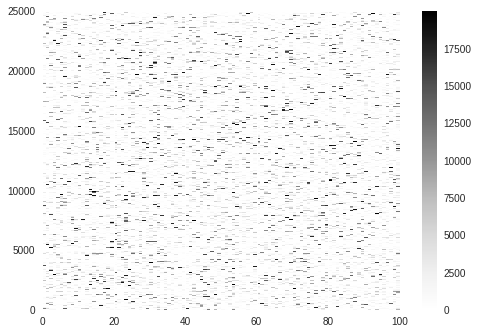

In [0]:
import matplotlib.pyplot as plt
import numpy as np

print(x_train[0,:])
plt.imshow(x_train,extent=[0, 100, 0, 25000], aspect='auto')
plt.colorbar()

(25000,)
0


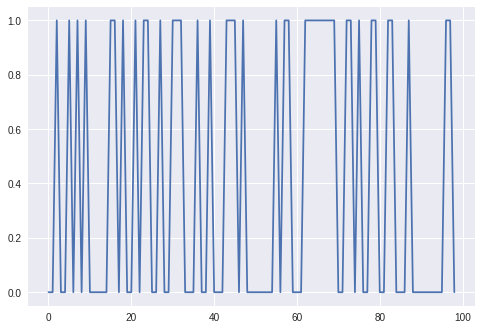

In [0]:
print(y_train.shape)
print(y_train[1,])
plt.plot(y_train[1:100,])


In [0]:
# Convolution 1 
kernel_size = 5
filters = 64
pool_size = 4

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))


Build model...


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 76s 3ms/step - loss: 0.3883 - acc: 0.8126 - val_loss: 0.3116 - val_acc: 0.8635
Epoch 2/2
25000/25000 [==============================] - 75s 3ms/step - loss: 0.1793 - acc: 0.9334 - val_loss: 0.3730 - val_acc: 0.8426


In [0]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 20s 794us/step
Test score: 0.37303480920791626
Test accuracy: 0.8425599935293198


**Mount your google drive to load and save from**


Note you have to follow the link here and get the activation code before proceeding

In [0]:
#mount google drive to load own images, follow link and get code and paste in below
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
